# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Zian Zhuang

Student ID: 1002449870

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? ___
* What are the target classes? ___
* What do these target classes signify?  ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [2]:
# Part1 Q1
import numpy as np
import pandas as pd
feature_data = dataset.data
target_data = dataset.target
feature_names = dataset.feature_names
target_names = dataset.target_names

df = pd.DataFrame(feature_data, columns=feature_names)
df['target'] = target_data

print("How many features do we have in this dataset? ", feature_names.size)
print("What are the target classes? ", np.unique(target_data))
print("What do these target classes signify? ", target_names)
print("How many participants tested Malignant? ", len(df[df['target']==0]))
print("How many participants tested Benign? ", len(df[df['target']==1]))



How many features do we have in this dataset?  30
What are the target classes?  [0 1]
What do these target classes signify?  ['malignant' 'benign']
How many participants tested Malignant?  212
How many participants tested Benign?  357


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

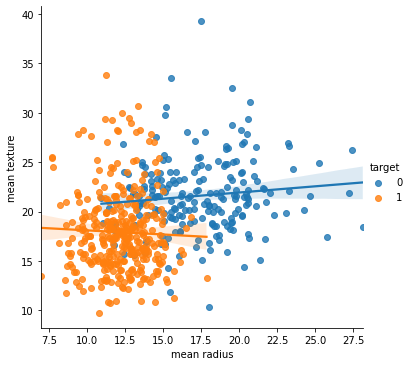

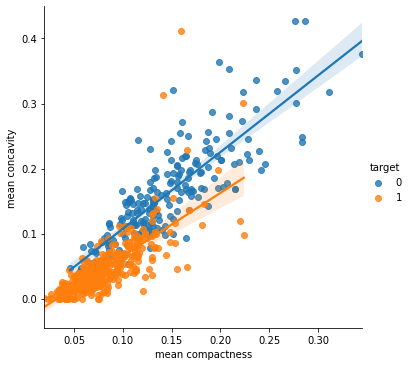

In [3]:
# Part1 Q2
import seaborn
seaborn.lmplot(x='mean radius', y='mean texture', hue='target', data=df) # 0 - 'malignant' ; 1 - 'benign'
seaborn.lmplot(x='mean compactness', y='mean concavity', hue='target', data=df)

Answer: The data distribution look the same, but the scaling are CHANGED to the same scale. 
 It is because the underlying distribution remains the same during standardization.  
 Only units of measurements are changed.


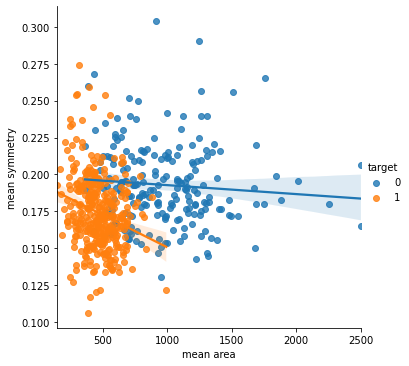

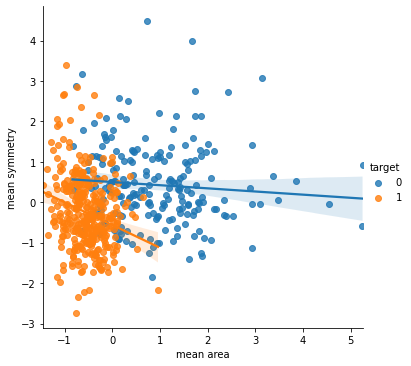

In [4]:
# Part1 Q3
# plot of original data
seaborn.lmplot(x='mean area', y='mean symmetry', hue='target', data=df)

# standardize scaling using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature_data)
feature_data_standardized = scaler.transform(feature_data)

df_standardized = pd.DataFrame(feature_data_standardized, columns=feature_names)
df_standardized['target'] = target_data

# plot of standardized data
seaborn.lmplot(x='mean area', y='mean symmetry', hue='target', data=df_standardized)

print ("Answer: The data distribution look the same, but the scaling are CHANGED to the same scale. \n It is because the underlying distribution remains the same during standardization.  \n Only units of measurements are changed.")

In [5]:
# Part1 Q4
# splitting original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**



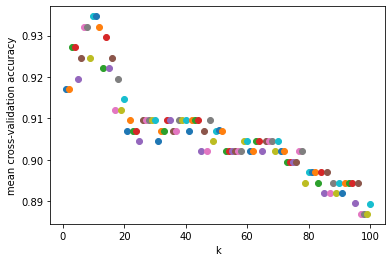

In [6]:
# Part2 Step1
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

for k in range(1, 101): # sweep k from 1 to 100
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5) # 5 fold
    plt.scatter(k, scores.mean())
    plt.ylabel('mean cross-validation accuracy')
    plt.xlabel('k')

In [7]:
# Part2 Step2
# initialize
best_k = 0
best_scores = 0

for k in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    if scores.mean() > best_scores: # updating best k
      best_k = k
      best_scores = scores.mean()

print('The best k: ', best_k, " with mean cross-validation accuracy", best_scores)
print('If we use 92% accuracy as threshold (consider as acceptable), based on previous graph: \n k < 3 leads overfitting \n k > 17 leads underfitting')

The best k:  10  with mean cross-validation accuracy 0.9346518987341772
If we use 92% accuracy as threshold (consider as acceptable), based on previous graph: 
 k < 3 leads overfitting 
 k > 17 leads underfitting


Observation: by trial and error, we notice: 
 For a random number of features removed, it is possible to obtain the same accuracy as the previous knn model 
 as long as the most influential features are not removed


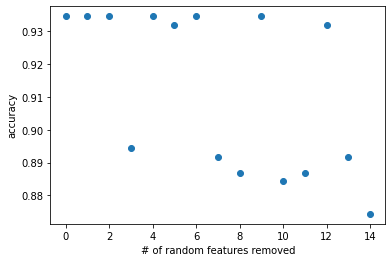

In [8]:
# Part2 Step3
# using trial and error
import random
# initialize
dataframe_i = []
accuracy_i = []

for i in range(15): # eg. 15 tests
  df_i = df.copy() # initialize a dataframe from df
  # TRIALS: eg. test 1 - remove 1 random column; test 2 - remove 2 random columns; etc
  for j in random.sample(range(0,30), i):
    df_i = df_i.drop(df.columns[j], axis=1)

  feature_data_temp = df_i.iloc[:, :-1].values # get the feature data for df_i

  # spliting data for df_i
  X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(feature_data_temp, target_data, test_size=0.3, random_state=0)
  
  # construct knn for df_i with k as the best_k = 10 (based on previous steps)
  knn_temp = neighbors.KNeighborsClassifier(n_neighbors=10)
  scores_temp = cross_val_score(knn_temp, X_train_temp, y_train_temp, cv=5)

  # record the result
  dataframe_i.append(i)
  accuracy_i.append(scores_temp.mean())

# plot
plt.scatter(dataframe_i, accuracy_i)
plt.xlabel('# of random features removed')
plt.ylabel('accuracy')
print('Observation: by trial and error, we notice: \n For a random number of features removed, it is possible to obtain the same accuracy as the previous knn model \n as long as the most influential features are not removed')

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**


In [9]:
#Part 3 Q1

scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)

best_k_standardized = 0
best_scores_standardized = 0

for k in range(1, 101):
    knn_standardized = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores_standardized = cross_val_score(knn_standardized, X_train_standardized, y_train, cv=5)
    if scores_standardized.mean() > best_scores_standardized:
      best_k_standardized = k
      best_scores_standardized = scores_standardized.mean()

print('The best k: ', best_k_standardized, " with mean cross-validation accuracy", best_scores_standardized)     


The best k:  10  with mean cross-validation accuracy 0.9674367088607594


In [10]:
# question 2
print('Yes. \n In comparison with part 2, the model accuracy is improved by,', best_scores_standardized - best_scores, 'with best k = 10')
print('It helps to improve the ML model for k-NN because it makes all variables to contribute equally to the similarity measures.')

Yes. 
 In comparison with part 2, the model accuracy is improved by, 0.03278481012658219 with best k = 10
It helps to improve the ML model for k-NN because it makes all variables to contribute equally to the similarity measures.


## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

In [11]:
from sklearn.metrics import accuracy_score

# standardize test data to evaluated knn model learned from standardized data
scaler.fit(X_test)
X_test_standardized = scaler.transform(X_test)

knn_final = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_final.fit(X_train_standardized, y_train)

accuracy_final = accuracy_score(y_test, knn_final.predict(X_test_standardized))
print ("Accuracy on the test data is: ", accuracy_final * 100, "%")


Accuracy on the test data is:  95.90643274853801 %


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

best k:  18  with model accuracy on training data 0.976
Model accuracy on test data:  100.0 %


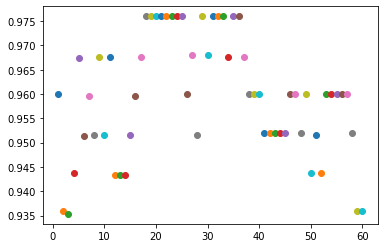

In [13]:
# Introduce Dataset, I am using sklearn data set "load_wine"
from sklearn.datasets import load_wine
dataset_w = load_wine()

feature_data_w = dataset_w.data
feature_names_w = dataset_w.feature_names
target_data_w = dataset_w.target
target_names_w = dataset_w.target_names

df_w = pd.DataFrame(feature_data_w, columns=feature_names_w)
df_w['target'] = target_data_w

# splitting dataset
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(feature_data_w, target_data_w, test_size=0.3, random_state=0)
5
# standardize training data
scaler.fit(X_train_w)
X_train_stand_w = scaler.transform(X_train_w)

# build knn classifier
best_k_stand_w = 0
best_scores_stand_w = 0
for k in range(1, 61):
    knn_stand_w = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores_stand_w = cross_val_score(knn_stand_w, X_train_stand_w, y_train_w, cv=5)
    plt.scatter(k, scores_stand_w.mean()) 
    if scores_stand_w.mean() > best_scores_stand_w:
      best_k_stand_w = k
      best_scores_stand_w = scores_stand_w.mean()
print('best k: ', best_k_stand_w, " with model accuracy on training data", best_scores_stand_w)


# evaluate on test data
scaler.fit(X_test_w)
X_test_stand_w = scaler.transform(X_test_w)

knn_stand_w = neighbors.KNeighborsClassifier(n_neighbors=best_k_stand_w)
knn_stand_w.fit(X_train_stand_w, y_train_w)

accuracy_w = accuracy_score(y_test_w, knn_stand_w.predict(X_test_stand_w))
print ("Model accuracy on test data: ", accuracy_w * 100, "%")
